In [1]:
## Importing the required libraries

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

In [3]:
trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

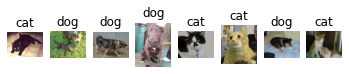

In [4]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

# Showing the image data

In [5]:
## Defining a function preprocess for resizing the image and for labelling it

def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label

In [6]:
HEIGHT = 200
WIDTH = 200
split = ['train[:70%]', 'train[70%:]']

In [7]:
## Loading dataset with batch size = 32

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)
 
trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

In [8]:
# Making model and adding convolutional layers and maxpooling layers

## Layers are made up of NODES, which take one of more weighted input connections and produce an output connection.

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
## Compiling the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Calculating the loss function and accuracy of the model with epoch of 10

trainHistory = model.fit(trainDataset, epochs=10, validation_data=testDataset)

Epoch 1/10
509/509 [==============================] - 1420s 3s/step - loss: 0.5990 - accuracy: 0.6721 - val_loss: 0.5957 - val_accuracy: 0.6336
Epoch 2/10
509/509 [==============================] - 1099s 2s/step - loss: 0.4606 - accuracy: 0.7815 - val_loss: 0.5590 - val_accuracy: 0.7108
Epoch 3/10
509/509 [==============================] - 1054s 2s/step - loss: 0.3831 - accuracy: 0.8254 - val_loss: 0.5941 - val_accuracy: 0.7236
Epoch 4/10
509/509 [==============================] - 1060s 2s/step - loss: 0.3065 - accuracy: 0.8670 - val_loss: 0.5612 - val_accuracy: 0.7530
Epoch 5/10
509/509 [==============================] - 1048s 2s/step - loss: 0.2313 - accuracy: 0.9059 - val_loss: 0.5935 - val_accuracy: 0.7819
Epoch 6/10
509/509 [==============================] - 1046s 2s/step - loss: 0.1608 - accuracy: 0.9361 - val_loss: 0.6261 - val_accuracy: 0.7812
Epoch 7/10
509/509 [==============================] - 1028s 2s/step - loss: 0.1125 - accuracy: 0.9583 - val_loss: 0.6804 - val_accuracy:

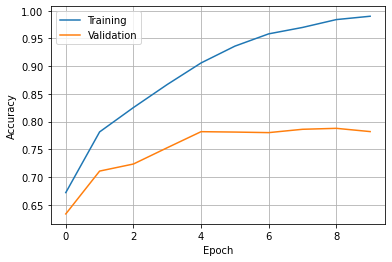

219/219 [==============================] - 113s 515ms/step - loss: 1.0509 - accuracy: 0.7821
1.050940752029419
0.782060444355011


In [11]:
# Plotting the train history of the model 

plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
 
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

### The model successfully evaluated the accuracy, the accuracy of the model is 78%

In [12]:
## Saving our model in the file model.h5 as shown below.

model.save('model.h5')

In [13]:
## Preprocessing of image for test data

def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, tf.cast(label, tf.float32)

In [14]:
HEIGHT = 200
WIDTH = 200
classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

In [15]:
trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)
 
testDataset = testDataset.map(preprocess).batch(1) # mapping

#### Batch size is 1 because we take a small amount of images for testing.

In [16]:
model = keras.models.load_model('model.h5')

#### Model has one output which value is in the range from 0 to 1. To determine label we use these conditions:

If prediction < 0.5 then label = 0 (cat)
If prediction >= 0.5 then label = 1 (dog)

8/8 [==============================] - 2s 84ms/step


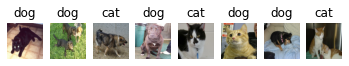

In [17]:
## Prediction part from Dog and Cat

predictions = model.predict(testDataset.take(8))
 
i = 0
fig, ax = plt.subplots(1, 8)
for image, _ in testDataset.take(8):
    predictedLabel = int(predictions[i] >= 0.5)
 
    ax[i].axis('off')
    ax[i].set_title(classNames[predictedLabel])
    ax[i].imshow(image[0])
    i += 1
    
plt.show()

### Predictions was made for the first 8 testing images. A model incorrectly predicted class for fifth image.

### Hence, prediction completed successfully with an accuracy rate of 78%